## V1

In [ ]:
using ModelingToolkit
using ModelingToolkit: t_nounits as t, D_nounits as D

@mtkmodel FOL begin
    @parameters begin
        m
        g
        Crr
        CdA
        rho
        
    end
    @variables begin
        x(t) 
        v(t)
        P_in(t)
        F_roll(t)
        F_aero(t)
        F_res(t)
    end
    @equations begin
        P_in ~ 100
        F_roll ~ m * g * Crr
        F_aero ~ (CdA / 2) * rho * v^2
        F_res ~ (P_in / v) - (F_roll + F_aero)
        D(x) ~ v
        D(D(x)) ~ F_res / m
    end
end

using DifferentialEquations: solve
@mtkbuild fol = FOL()
prob = ODEProblem(fol, [fol.x => 0.0,
                        fol.v => 25 / 3.6,
                        fol.P_in => 0.0,
                        fol.F_roll => 0.0,
                        fol.F_aero => 0.0,
                        fol.F_res => 0.0],
    (0.0, 3 * 60.0), 
    [fol.m => 75,
        fol.g => 9.7864, 
        fol.Crr => 0.005,
        fol.CdA => 0.40,
        fol.rho => 1.1])
sol = solve(prob)

using Plots
plot(sol, vars=[fol.v * 3.6])

# V2

In [53]:
using ModelingToolkit
using DataInterpolations
using ModelingToolkit: t_nounits as t, D_nounits as D


# Dependent variable
h = [50, 50, 0, 0, 50, 50]
# Independent variable
x = [0, 200, 600, 800, 1200, 1400]
h_interp = LinearInterpolation(h, x)


# Dependent variable
theta = [0, 0.124442, 0, 0, 0.124442, 0]
# Independent variable
x = [0, 200, 600, 800, 1200, 1400]
theta_interp = ConstantInterpolation(theta, x, extrapolate=true)

ConstantInterpolation with 6 points, in left direction
┌────────┬──────────┐
│   time │        u │
├────────┼──────────┤
│    0.0 │      0.0 │
│  200.0 │ 0.124442 │
│  600.0 │      0.0 │
│  800.0 │      0.0 │
│ 1200.0 │ 0.124442 │
│ 1400.0 │      0.0 │
└────────┴──────────┘


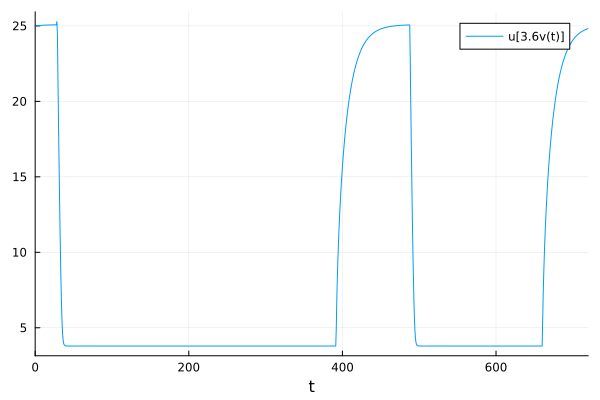

In [68]:
@mtkmodel FOL begin
    @parameters begin
        m
        g
        Crr
        CdA
        rho
        
    end
    @variables begin
        x(t) 
        v(t)
        P_in(t)
        F_roll(t)
        F_grav(t)
        F_aero(t)
        F_res(t)
        theta(t)
        h(t)
    end
    @equations begin
        P_in ~ 100
        F_roll ~ m * g * Crr * cos(theta)
        F_grav ~ m * g * sin(theta)
        F_aero ~ (CdA / 2) * rho * v^2
        F_res ~ (P_in / v) - (F_roll + F_aero + F_grav)
        D(x) ~ v
        D(D(x)) ~ F_res / m
        theta ~ theta_interp(x)
    end
end

using DifferentialEquations: solve
@mtkbuild fol = FOL()
prob = ODEProblem(fol, [fol.x => 0.0,
                        fol.v => 25 / 3.6,
                        fol.P_in => 0.0,
                        fol.F_roll => 0.0,
                        fol.F_grav => 0.0,
                        fol.F_aero => 0.0,
                        fol.F_res => 0.0],
    (0.0, 12 * 60), 
    [fol.m => 75,
        fol.g => 9.7864, 
        fol.Crr => 0.005,
        fol.CdA => 0.40,
        fol.rho => 1.1,
        fol.theta => 0.0])
sol = solve(prob)

using Plots
plot(sol, vars=[fol.v * 3.6])

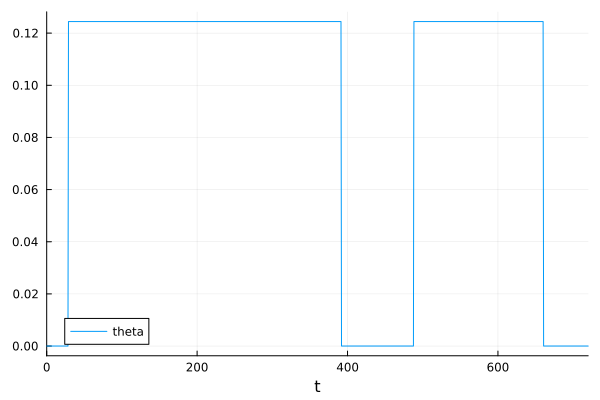

In [69]:
plot(sol, vars=[fol.theta])

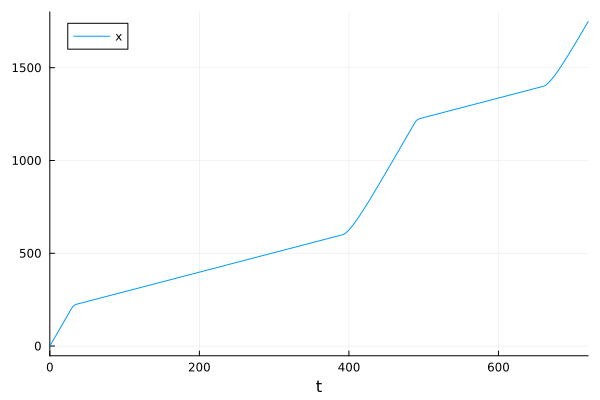

In [70]:
plot(sol, vars=[fol.x])